To undesrtand the envirnment of Blackjack checkout the [documentation](https://gymnasium.farama.org/environments/toy_text/blackjack/#blackjack) 

In [35]:
from collections import defaultdict
import gymnasium as gym
from tqdm import tqdm
import numpy as np
from gym.wrappers.record_episode_statistics import RecordEpisodeStatistics
env=gym.make('Blackjack-v1', natural=False, sab=False)

In [36]:


class BlackJackAngent:
   
   """
   Create an RL agent with an empty dictionary for Q-values (state->action value ).
   This is a model free agent since it has no explicilt definition of the model (how the environment works).
   A learning rate and the epsilon fot the espilon-greedy strategy to explore new action .
   
   Discount factor : the bigger the discount factor the more the agent will care also about the future rewards.
   """
   def __init__(self,learning_rate:float,initial_eps:float,eps_decay:float,final_eps:float,discount_factor:float=0.95) -> None:
      self.q_values=defaultdict(lambda:np.zeros(env.action_space.n))
      self.learning_rate=learning_rate
      self.discount_factor=discount_factor
      self.eps=initial_eps
      self.final_eps=final_eps
      self.eps_decay=eps_decay
      self.training_error=[]
   
   
   def get_action(self,state:tuple[int,int,bool])->int:
      """
      Return the action to take in the current state.
      It implements the epsilon-greedy strategy to ensure more exploration.
      """
      if np.random.random()<self.eps:
         return env.action_space.sample()
      else:
         return int(np.argmax(self.q_values[state]))
      
   def upadte(self,state:tuple[int,int,bool],action:int,reward:float,terminated:bool,next_state:tuple[int,int,bool])->None:
      """
      Update the Q-value of an action 
      """      
      
      # take the best reward of the next state based on prrvious experience (if the state is not yet explored just set it to 0)
      
      
      future_q_value=(not terminated)*np.max(self.q_values[next_state])
      
      
      # Computing the difference  according to the Bellman equation
      temporal_difference=reward+self.discount_factor*future_q_value-self.q_values[state][action]
      
      # updating the Q-value of the action
      self.q_values[state][action]+=self.learning_rate*temporal_difference
      self.training_error.append(temporal_difference)
   
   
   def decay_eps(self):
      self.eps=max(self.final_eps,self.eps-self.eps_decay)



  

In [37]:
# training the agent
n_episodes=1000


agent=BlackJackAngent(learning_rate=0.01,initial_eps=1,eps_decay=1/(n_episodes/2),final_eps=0.1)

env=RecordEpisodeStatistics(env=env,deque_size=n_episodes)

for episode in tqdm(range(n_episodes)):
   state,info=env.reset()
   done=False

   while not done:
      action=agent.get_action(state)
      next_state,reward,terminated,truncated,info=env.step(action)
      agent.upadte(state,action,reward,terminated,next_state)
      done=terminated or truncated
      state=next_state
      
   # decay the epsilon after  each episode
   agent.decay_eps()

100%|██████████| 1000/1000 [00:00<00:00, 8034.05it/s]


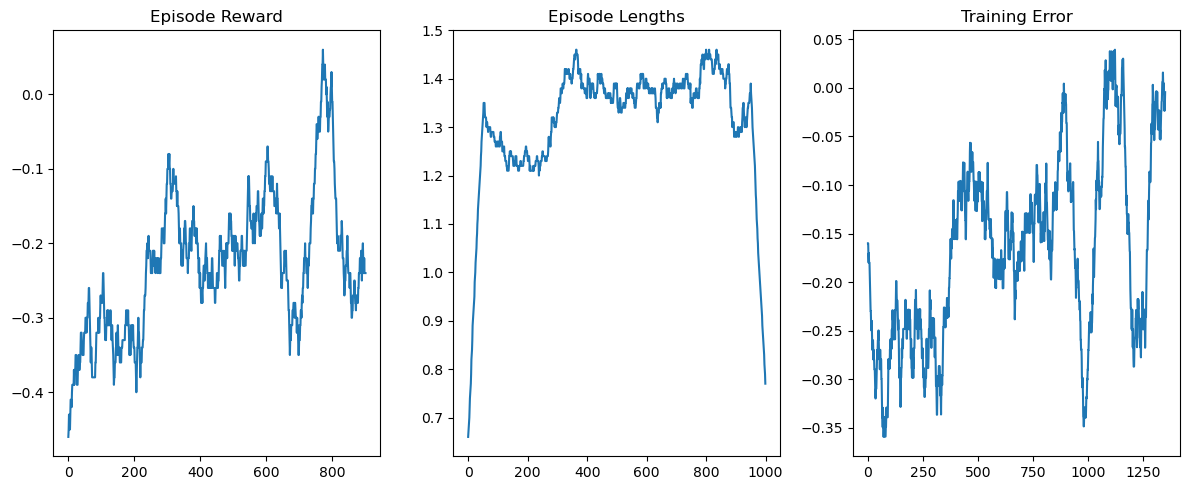

In [38]:
# train visualization
import matplotlib.pyplot as plt
rolling_length=100

fig,axs=plt.subplots(ncols=3,figsize=(12,5))

axs[0].set_title("Episode Reward")
reward_moving_average=np.convolve(np.array(env.return_queue).flatten(),np.ones(rolling_length),mode="valid")/rolling_length

axs[0].plot(range(len(reward_moving_average)),reward_moving_average)


axs[1].set_title("Episode Lengths")

length_moving_average=np.convolve(np.array(env.length_queue).flatten(),np.ones(rolling_length),mode="same")/rolling_length
axs[1].plot(range(len(length_moving_average)),length_moving_average)


axs[2].set_title("Training Error")


trainin_error_moving_average=np.convolve(np.array(agent.training_error).flatten(),np.ones(rolling_length),mode="same")/rolling_length
axs[2].plot(range(len(trainin_error_moving_average)),trainin_error_moving_average)

plt.tight_layout()
plt.show()

The Q_values array is a state -> array of rewards dict . Where the state is a tuple [int,int,bool] and the array of rewards is basically [reward of action 0,reward of action 1 ] in this index 

In [43]:

print(agent.q_values.keys())

dict_keys([(20, 5, 0), (14, 7, 0), (9, 10, 0), (5, 2, 0), (23, 10, 0), (15, 10, 0), (16, 3, 0), (15, 3, 0), (20, 3, 0), (30, 3, 0), (16, 10, 0), (13, 10, 0), (26, 10, 0), (12, 10, 0), (21, 9, 0), (21, 9, 1), (20, 10, 0), (15, 1, 0), (13, 1, 0), (21, 1, 0), (14, 1, 0), (26, 1, 0), (21, 8, 0), (18, 8, 0), (22, 8, 0), (20, 8, 0), (13, 3, 0), (8, 3, 0), (23, 7, 0), (16, 7, 0), (21, 7, 0), (15, 7, 0), (31, 7, 0), (22, 10, 0), (17, 10, 0), (27, 8, 0), (17, 8, 0), (17, 5, 0), (10, 5, 0), (19, 10, 0), (11, 10, 0), (28, 7, 0), (18, 7, 0), (13, 8, 1), (30, 8, 0), (21, 10, 1), (14, 10, 0), (21, 10, 0), (27, 10, 0), (28, 1, 0), (18, 1, 0), (19, 8, 0), (11, 8, 0), (29, 8, 0), (12, 6, 0), (15, 10, 1), (30, 7, 0), (20, 7, 0), (28, 10, 0), (27, 4, 0), (17, 4, 0), (25, 2, 0), (17, 2, 0), (31, 10, 0), (21, 3, 0), (17, 3, 0), (31, 3, 0), (15, 2, 0), (13, 7, 0), (10, 1, 0), (14, 8, 0), (17, 10, 1), (13, 2, 0), (18, 9, 1), (12, 10, 1), (15, 6, 0), (21, 6, 0), (23, 6, 0), (14, 5, 0), (16, 5, 0), (20, 4, 0),

: 